Using Colab cache for faster access to the 'india-air-quality-data' dataset.
Dataset downloaded at: /kaggle/input/india-air-quality-data
Dataset Loaded Successfully
  stn_code       sampling_date           state   location agency  \
0      150  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1      151  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2      152  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3      150     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4      151     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        dat

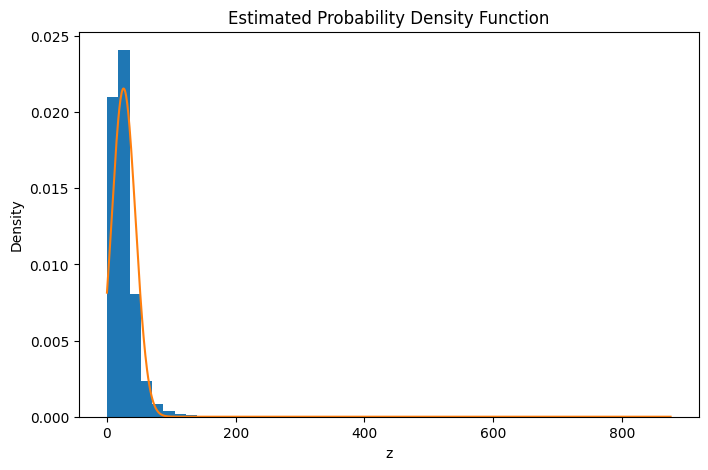

In [5]:
# ==========================================
# Assignment-1
# Roll Number: 102303196
# ==========================================

# -------------------------------------------------
# STEP 0: Install & Import Libraries
# -------------------------------------------------
!pip install kagglehub

import kagglehub
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt

# -------------------------------------------------
# STEP 1: Download Dataset from Kaggle
# -------------------------------------------------
path = kagglehub.dataset_download("shrutibhargava94/india-air-quality-data")
print("Dataset downloaded at:", path)

# -------------------------------------------------
# STEP 2: Load CSV File Automatically
# -------------------------------------------------
csv_file = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            break

data = pd.read_csv(csv_file, encoding='latin1', low_memory=False)

print("Dataset Loaded Successfully")
print(data.head())

# -------------------------------------------------
# STEP 3: Extract NO2 Feature
# -------------------------------------------------
no2vals = data["no2"].dropna().values
print("Total NO2 values:", len(no2vals))

# -------------------------------------------------
# STEP 4: Compute a_r and b_r (from Roll No)
# -------------------------------------------------
r = 102303196

ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print("\na_r =", ar)
print("b_r =", br)

# -------------------------------------------------
# STEP 5: Apply Correct Transformation
# z = x + a_r * sin(b_r * x)
# -------------------------------------------------
zarray = no2vals + ar * np.sin(br * no2vals)

print("Transformation completed")

# -------------------------------------------------
# STEP 6: Estimate PDF Parameters
# p(z) = c * exp(-λ (z - μ)^2)
# -------------------------------------------------
mu = np.mean(zarray)
variance = np.var(zarray)

lambdaValue = 1 / (2 * variance)
cValue = math.sqrt(lambdaValue / math.pi)

print("\nEstimated Parameters:")
print("lambda =", lambdaValue)
print("mu =", mu)
print("c =", cValue)

# -------------------------------------------------
# STEP 7: Plot Learned PDF
# -------------------------------------------------
z_vals = np.linspace(min(zarray), max(zarray), 1000)
pdf = cValue * np.exp(-lambdaValue * (z_vals - mu)**2)

plt.figure(figsize=(8,5))
plt.hist(zarray, bins=50, density=True)
plt.plot(z_vals, pdf)
plt.title("Estimated Probability Density Function")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()
